# `ANOVA ----------------------------------`

---


![](https://cdn.technologynetworks.com/tn/images/thumbs/jpeg/640_360/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553.jpg)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
data=pd.read_csv('Churn_Modelling.csv')

## `One way ANOVA`

### `Mathematics behind it`

In [123]:
Total_mean=data['EstimatedSalary'].mean()
Total_mean

100090.2398809998

### `SST -----------------------------------------------( Sum of squares total )`

In [124]:
tot = 0
for i in data['EstimatedSalary']:
    tot = tot + (i-Total_mean) ** 2
SST = tot
SST

33071260384561.055

In [125]:
n=len(data['EstimatedSalary'])
df_total = n - 1
df_total

9999

### `SSB ------------------------------------------( Sum of Squares Between )`

In [126]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']

In [127]:
mean_grp_france=grp_france.mean()
mean_grp_germany=grp_germany.mean()
mean_grp_spain=grp_spain.mean()

In [128]:
SSB = (len(grp_france) * (mean_grp_france - Total_mean) ** 2) + (len(grp_germany) * (mean_grp_germany - Total_mean) ** 2) + (len(grp_spain) *(mean_grp_spain - Total_mean) ** 2)
SSB

3855234803.335819

In [129]:
C = 3
df_columns= C-1   # degree of freedom
df_columns

2

### `MSB`

In [130]:
MSB = SSB / df_columns
MSB

1927617401.6679094

### `SSE ------------------------------------------( Sum of squares within / error)`

In [131]:
fran_tot = 0
for i in grp_france:
    fran_tot = fran_tot + (i - mean_grp_france) ** 2
fran_tot

16479987041382.168

In [132]:
ger_tot = 0
for i in grp_germany:
    ger_tot = ger_tot + (i - mean_grp_germany) ** 2
ger_tot

8513602900859.931

In [133]:
spain_tot = 0
for i in grp_spain:
    spain_tot = spain_tot + (i - mean_grp_spain) ** 2
spain_tot

8073815207515.501

In [134]:
SSE = fran_tot + spain_tot + ger_tot
SSE

33067405149757.598

### `MSE`

In [135]:
MSE = SSE / (n - C)  # degree of freedom
MSE

3307732834.8262076

#### Just checking

In [136]:
SST #### SST

33071260384561.055

In [137]:
sums = SSB + SSE   #### Sum of Both

In [138]:
if SST == (SSE + SSB):   # fulfilled the condition
    print('Calculations are correct')
else:
    print('You made some error')
    print(f'Difference of:{SST - sums}')

You made some error
Difference of:0.12109375


### F-score

In [139]:
F_value = MSB / MSE  
print(f'F-value: {F_value}')
print(f'df1 = {df_columns}')   # numerator df
print(f'df2 = {(n - C)}')       # denominator df
print(f'alpha = {0.05}')

F-value: 0.5827609114534756
df1 = 2
df2 = 9997
alpha = 0.05


### Manually we found from Tables:
> - **Critical F-value:	2.99663016** [Link to find F-critical](https://www.danielsoper.com/statcalc/calculator.aspx?id=4)
> - **F-statistic: 0.5827609114534756**
> - **P-value: .558408** [Link to find P-value](https://www.socscistatistics.com/pvalues/fdistribution.aspx)


#### F-statistic < F-critical : `Fail to reject null hypothesis`
#### P-value > 0.05 : `Fail to reject null hypothesis`
#### `Geography and estimated Salary are not related`

-----

### `Direct Function`

In [140]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

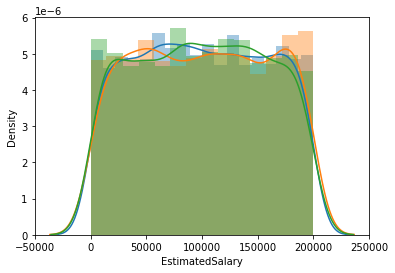

In [141]:
sns.distplot(grp_france)
sns.distplot(grp_germany)
sns.distplot(grp_spain)

In [142]:
df_total= n-1
df_total

9999

In [143]:
from scipy.stats import f_oneway

f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.5827609114534064, pvalue=0.5583736355799094)

#### pvalue is > then 0.05  `Fail to reject null hypothesis`
#### `EstimatedSalary and Geography are not related`

## `Two way ANOVA ( one numerical, 2 categorical )` 2 dimensions ( row and column )

### `Direct function`

#### Example 1

In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('Age ~ Gender + Geography + Gender:Geography', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,7.743494e+02,1.0,7.058593,0.007901
Geography,2.597272e+03,2.0,11.837735,0.000007
Gender:Geography,2.645788e+01,2.0,0.120589,0.886400
Residual,1.096373e+06,9994.0,NaN,NaN


#### `Since both Gender and Geography are < 0.05, both factors have a statistically significant effect on Age`.

--------------------

#### Example 2

- A two-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups that have been split on two factors.

- The purpose of a two-way ANOVA is to determine how two factors impact a response variable, and to determine whether or not there is an interaction between the two factors on the response variable.

- This tutorial explains how to conduct a two-way ANOVA in Python.

##### Example: Two-Way ANOVA in Python
- A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches.

##### Use the following steps to perform a two-way ANOVA to determine if watering frequency and sunlight exposure have a significant effect on plant growth, and to determine if there is any interaction effect between watering frequency and sunlight exposure.

### Step 1: Enter the data.

First, we’ll create a pandas DataFrame that contains the following three variables:

- water: how frequently each plant was watered: daily or weekly
- sun: how much sunlight exposure each plant received: low, medium, or high
- height: the height of each plant (in inches) after two months

In [115]:
import numpy as np
import pandas as pd

#create data
data = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
data[:10]

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


### Step 2: Perform the two-way ANOVA.

- Next, we’ll perform the two-way ANOVA using the **anova_lm()** function from the statsmodels library:

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('height ~ water + sun + water:sun', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
water,8.533333,1.0,16.0000,0.000527
sun,24.866667,2.0,23.3125,0.000002
water:sun,2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


### Step 3: Interpret the results.

We can see the following p-values for each of the factors in the table:

- **water:** p-value = .000527
- **sun:** p-value = .0000002
- **water*sun:** p-value = .120667
> - Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

- And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is **no significant interaction effect between sunlight exposure and watering frequency**.

> - Note: Although the ANOVA results tell us that watering frequency and sunlight exposure have a statistically significant effect on plant height, we would need to perform post-hoc tests to determine exactly how different levels of water and sunlight affect plant height.

# END ---------------------------------------------